# Does school funding impact students academic performance?

<img src="images/education-header.jpg" width="900" />



**Credit:**  [techxend](https://www.techxtend.com/site/content/education/) 

In [1]:
# Load relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sm
import warnings
import scipy.stats as st

#sns.set_theme(style="ticks", color_codes=True)


warnings.filterwarnings("ignore")  # Suppress all warnings

In [2]:
# read file
df = pd.read_csv('final_economic_merged.csv', index_col = 0)
df.head()

,District Code,Agency Name,Total Enrollment,Total Revenue,Revenue per student,Subgroup ID,Count Enrollment per ethnicity,County Code,Test Id,Mean Scale Score,...,Total Tested with Scores,CAASPP Reported Enrollment,Students Tested,Students with Scores,Total Standard Exceeded,Total Standard Met,Total Standard Met and Above,Total Standard Nearly Met,Total Standard Not Met,Disadvantaged
11111,61119.0,ALAMEDA UNIFIED,11159.0,96642000.0,8660.45,Two or More Races,1206.0,1.0,1.0,2574.514286,...,2660.0,388.0,380.0,380.0,182.0,111.0,293.0,44.0,43.0,Not Disadvantaged
7174,61119.0,ALAMEDA UNIFIED,11159.0,96642000.0,8660.45,Asian or Asian/Pacific Islander,3722.0,1.0,1.0,2590.300000,...,6146.0,895.0,878.0,878.0,419.0,299.0,718.0,106.0,54.0,Not Disadvantaged
7173,61119.0,ALAMEDA UNIFIED,11159.0,96642000.0,8660.45,Asian or Asian/Pacific Islander,3722.0,1.0,2.0,2600.685714,...,6181.0,895.0,883.0,883.0,458.0,240.0,698.0,124.0,61.0,Not Disadvantaged
7172,61119.0,ALAMEDA UNIFIED,11159.0,96642000.0,8660.45,Asian or Asian/Pacific Islander,3722.0,1.0,2.0,2548.071429,...,3591.0,519.0,513.0,513.0,134.0,167.0,301.0,131.0,81.0,Disadvantaged
11109,61119.0,ALAMEDA UNIFIED,11159.0,96642000.0,8660.45,Two or More Races,1206.0,1.0,1.0,2410.766667,...,630.0,60.0,60.0,60.0,5.0,9.0,14.0,18.0,28.0,Disadvantaged


In [3]:
# columns present on the dataset
df.columns

Index(['District Code', 'Agency Name', 'Total Enrollment', 'Total Revenue',
       'Revenue per student', 'Subgroup ID', 'Count Enrollment per ethnicity',
       'County Code', 'Test Id', 'Mean Scale Score',
       'Total Tested At Entity Level', 'Total Tested with Scores',
       'CAASPP Reported Enrollment', 'Students Tested', 'Students with Scores',
       'Total Standard Exceeded', 'Total Standard Met',
       'Total Standard Met and Above', 'Total Standard Nearly Met',
       'Total Standard Not Met', 'Disadvantaged'],
      dtype='object')

In [4]:
# checking unique ethinicities present in subgroup ID 
df['Subgroup ID'].unique()

array(['Two or More Races', 'Asian or Asian/Pacific Islander', 'Black',
       'Hispanic', 'White', 'Hawaiian Nat./Pacific Isl.',
       'American Indian/Alaska Native'], dtype=object)

In [5]:
# filtering for ethiniticies of interest
# Step 1: create list of the ethiniticies of interest
#list1 = ['White', 'Black', 'Hispanic', 'Asian or Pacific Islander', 'Two or More Races']

# Step 2: filter based on the list above
#df = df[df['Subgroup ID'].isin(list1)]
#df.head(5)

In [6]:
# filtering based on total enrollment
df = df[df['Total Enrollment'] != 0]
df = df[df['Total Enrollment'] > 250]

# need to filter out the 6 schools that have more students tested than enrolled

In [7]:
# filtering office of education out of the main dataset for analysis
# dataset containing only districts called office of education:
OFFICE_OF_EDUCATION = df[df['Agency Name'].str.contains('COUNTY OFFICE OF EDUCATION')]
print(OFFICE_OF_EDUCATION.shape)

# filter office of education out of the main dataset
df = df[~df['Agency Name'].str.contains('COUNTY OFFICE OF EDUCATION')]

# filter Charters out of the main dataset
df = df[~df['Agency Name'].str.contains('SBE - AUDEO CHARTER')]

# sort by alphabetical oder on Agency Name
df = df.sort_values(['Agency Name'])
df

(0, 21)


,District Code,Agency Name,Total Enrollment,Total Revenue,Revenue per student,Subgroup ID,Count Enrollment per ethnicity,County Code,Test Id,Mean Scale Score,...,Total Tested with Scores,CAASPP Reported Enrollment,Students Tested,Students with Scores,Total Standard Exceeded,Total Standard Met,Total Standard Met and Above,Total Standard Nearly Met,Total Standard Not Met,Disadvantaged
1608,64212.0,ABC UNIFIED,20722.0,226251000.0,10918.40,Hispanic,9425.0,19.0,1.0,2501.100000,...,25998.0,3805.0,3715.0,3714.0,492.0,1105.0,1598.0,1030.0,1087.0,Disadvantaged
3,64212.0,ABC UNIFIED,20722.0,226251000.0,10918.40,Black,1791.0,19.0,1.0,2503.342857,...,3682.0,543.0,527.0,526.0,76.0,169.0,246.0,124.0,157.0,Disadvantaged
11098,64212.0,ABC UNIFIED,20722.0,226251000.0,10918.40,Two or More Races,524.0,19.0,2.0,2483.166667,...,553.0,45.0,44.0,44.0,6.0,14.0,20.0,18.0,6.0,Disadvantaged
11099,64212.0,ABC UNIFIED,20722.0,226251000.0,10918.40,Two or More Races,524.0,19.0,1.0,2495.650000,...,560.0,56.0,54.0,54.0,17.0,16.0,33.0,9.0,12.0,Disadvantaged
11101,64212.0,ABC UNIFIED,20722.0,226251000.0,10918.40,Two or More Races,524.0,19.0,1.0,2597.571429,...,1827.0,265.0,261.0,261.0,137.0,83.0,220.0,24.0,17.0,Not Disadvantaged
4416,64212.0,ABC UNIFIED,20722.0,226251000.0,10918.40,White,1302.0,19.0,2.0,2509.828571,...,1512.0,226.0,216.0,216.0,27.0,56.0,83.0,71.0,62.0,Disadvantaged
4418,64212.0,ABC UNIFIED,20722.0,226251000.0,10918.40,White,1302.0,19.0,2.0,2559.985714,...,3143.0,463.0,449.0,449.0,144.0,141.0,285.0,108.0,56.0,Not Disadvantaged
4419,64212.0,ABC UNIFIED,20722.0,226251000.0,10918.40,White,1302.0,19.0,1.0,2575.485714,...,3129.0,463.0,447.0,447.0,175.0,166.0,341.0,66.0,40.0,Not Disadvantaged
7163,64212.0,ABC UNIFIED,20722.0,226251000.0,10918.40,Asian or Asian/Pacific Islander,7459.0,19.0,1.0,2579.185714,...,4403.0,645.0,629.0,629.0,272.0,220.0,492.0,85.0,52.0,Disadvantaged
7162,64212.0,ABC UNIFIED,20722.0,226251000.0,10918.40,Asian or Asian/Pacific Islander,7459.0,19.0,2.0,2589.614286,...,4494.0,645.0,642.0,642.0,302.0,165.0,467.0,112.0,63.0,Disadvantaged


In [8]:
# checking total enrollment data
# we see that there's a wide number of students per district. 
# the smallest district has 251 students and the largest over 630,000 students
df['Total Enrollment'].describe()

count      8211.000000
mean      13984.363415
std       39005.230547
min         251.000000
25%        2696.000000
50%        7066.000000
75%       15388.000000
max      633621.000000
Name: Total Enrollment, dtype: float64

In [9]:
# checking revenue per student data
# we see that the average capiutal per student is around 9640
# the minimum is 0 and the max capital per student is over 77000 clearly an outlier - we need to fix these
df['Revenue per student'].describe()

count      8211.000000
mean       9615.250228
std        4561.673494
min           0.000000
25%        7730.190000
50%        9512.710000
75%       11376.780000
max      167709.580000
Name: Revenue per student, dtype: float64

In [10]:
# dataset containing school districts with over $20,000 revenue per student
df_high_funding = df[(df['Revenue per student'] > 20_000)]

# update the main dataset to not include schools with over 20k revenue per student nor zero revenue per student
df = df[~(df['Revenue per student'] > 20_000)]
df = df[~(df['Revenue per student'] == 0)]

print(df_high_funding.shape)


(106, 21)


In [11]:
# checking the school districts that have revenue per student higher than 20,000
df_high_funding['Agency Name'].unique()

array(['BAYSHORE ELEMENTARY', 'BYRON UNION ELEMENTARY', 'EMERY UNIFIED',
       'KLAMATH-TRINITY JOINT UNIFIED', 'LAKESIDE UNION ELEMENTARY',
       'LAWNDALE ELEMENTARY', 'MOUNT PLEASANT ELEMENTARY',
       'MOUNTAIN VIEW ELEMENTARY', 'OCEAN VIEW', 'TAFT UNION HIGH',
       'VAL VERDE UNIFIED', 'WASHINGTON UNIFIED', 'WOODSIDE ELEMENTARY'], dtype=object)

In [12]:
# Checking what the dataset looks like now
df.shape

(7935, 21)

--------------------

# DATASET TEST ID 1

In [13]:
# splitting the main dataset into test 1 and test 2 datasets
# then, splitting test 1 dataset into several datasets according to total enrollment

# Filter based on TEST ID1
list = ['1.0']
test_Id1 = df[df['Test Id'].isin(list)]
test_ID1 = test_Id1.drop(['Test Id', 'County Code', 'Total Tested At Entity Level', 
               'Total Standard Met and Above', 'Total Revenue',
              'Total Tested with Scores', 'Students with Scores', 'District Code'], axis=1)
test_ID1.head()

,Agency Name,Total Enrollment,Revenue per student,Subgroup ID,Count Enrollment per ethnicity,Mean Scale Score,CAASPP Reported Enrollment,Students Tested,Total Standard Exceeded,Total Standard Met,Total Standard Nearly Met,Total Standard Not Met,Disadvantaged
1608,ABC UNIFIED,20722.0,10918.4,Hispanic,9425.0,2501.100000,3805.0,3715.0,492.0,1105.0,1030.0,1087.0,Disadvantaged
3,ABC UNIFIED,20722.0,10918.4,Black,1791.0,2503.342857,543.0,527.0,76.0,169.0,124.0,157.0,Disadvantaged
11099,ABC UNIFIED,20722.0,10918.4,Two or More Races,524.0,2495.650000,56.0,54.0,17.0,16.0,9.0,12.0,Disadvantaged
11101,ABC UNIFIED,20722.0,10918.4,Two or More Races,524.0,2597.571429,265.0,261.0,137.0,83.0,24.0,17.0,Not Disadvantaged
4419,ABC UNIFIED,20722.0,10918.4,White,1302.0,2575.485714,463.0,447.0,175.0,166.0,66.0,40.0,Not Disadvantaged


In [14]:
corr = test_ID1.corr()
corr.style.background_gradient(cmap='coolwarm')
# 'RdBu_r' & 'BrBG' are other good diverging colormaps

,Total Enrollment,Revenue per student,Count Enrollment per ethnicity,Mean Scale Score,CAASPP Reported Enrollment,Students Tested,Total Standard Exceeded,Total Standard Met,Total Standard Nearly Met,Total Standard Not Met
Total Enrollment,1,0.11325,0.490357,0.0157829,0.372333,0.369092,0.403793,0.384855,0.341382,0.324928
Revenue per student,0.11325,1,0.0683507,-0.206586,0.0593912,0.0596661,-0.0333191,0.0470057,0.0741086,0.0829793
Count Enrollment per ethnicity,0.490357,0.0683507,1,-0.0211636,0.781988,0.777057,0.642413,0.788114,0.764418,0.738742
Mean Scale Score,0.0157829,-0.206586,-0.0211636,1,-0.0473065,-0.0475689,0.14616,-0.0164864,-0.0808898,-0.105322
CAASPP Reported Enrollment,0.372333,0.0593912,0.781988,-0.0473065,1,0.999944,0.773167,0.990889,0.992007,0.977342
Students Tested,0.369092,0.0596661,0.777057,-0.0475689,0.999944,1,0.772169,0.990738,0.992328,0.977704
Total Standard Exceeded,0.403793,-0.0333191,0.642413,0.14616,0.773167,0.772169,1,0.825329,0.691254,0.629743
Total Standard Met,0.384855,0.0470057,0.788114,-0.0164864,0.990889,0.990738,0.825329,1,0.973779,0.943177
Total Standard Nearly Met,0.341382,0.0741086,0.764418,-0.0808898,0.992007,0.992328,0.691254,0.973779,1,0.991497
Total Standard Not Met,0.324928,0.0829793,0.738742,-0.105322,0.977342,0.977704,0.629743,0.943177,0.991497,1


In [15]:
# filtering for ethiniticies of interest
#Step 1: create list of the ethiniticies of interest
#list1 = ['White', 'Black', 'Hispanic', 'Asian or Pacific Islander']

# Step 2: filter based on the list above
#test_ID1 = test_ID1[test_ID1['Subgroup ID'].isin(list1)]
#test_ID1.head(5)

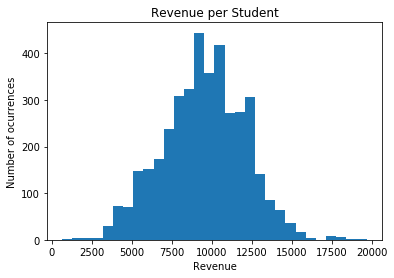

In [16]:
_ = plt.hist(test_ID1['Revenue per student'], density=False, bins=30)
_ = plt.ylabel('Number of ocurrences')
_ = plt.xlabel('Revenue')
_ = plt.title("Revenue per Student")

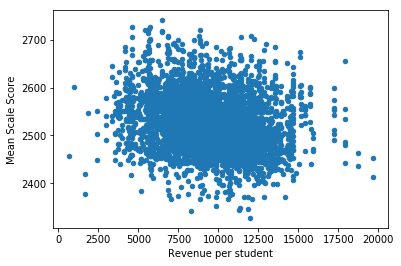

In [17]:
scatterplot1 = test_ID1[['Revenue per student', 'Mean Scale Score']]
scatterplot1
scatterplot1.plot.scatter(x='Revenue per student', y='Mean Scale Score')

# PASS/FAIL Dataset - Test ID 1

In [18]:
# adding pass and fail columns 
test_ID1['Pass'] = test_ID1['Total Standard Exceeded'] + test_ID1['Total Standard Met']
test_ID1['Fail'] = test_ID1['Total Standard Nearly Met'] + test_ID1['Total Standard Not Met']

# creating a new dataframe by copying
pass_fail_df = test_ID1.copy()

# dropping columns
pass_fail_df = pass_fail_df.drop(['Total Standard Exceeded', 'Total Standard Met', 'Total Standard Nearly Met', 
               'Total Standard Not Met', 'CAASPP Reported Enrollment', 'Count Enrollment per ethnicity'], axis=1)

#rearranging columns
pass_fail_df = pass_fail_df.reindex(columns=['Agency Name', 'Subgroup ID','Revenue per student', 
                                             'Mean Scale Score', 'Students Tested',
                                             'Pass', 'Fail'])

pass_fail_df

,Agency Name,Subgroup ID,Revenue per student,Mean Scale Score,Students Tested,Pass,Fail
1608,ABC UNIFIED,Hispanic,10918.40,2501.100000,3715.0,1597.0,2117.0
3,ABC UNIFIED,Black,10918.40,2503.342857,527.0,245.0,281.0
11099,ABC UNIFIED,Two or More Races,10918.40,2495.650000,54.0,33.0,21.0
11101,ABC UNIFIED,Two or More Races,10918.40,2597.571429,261.0,220.0,41.0
4419,ABC UNIFIED,White,10918.40,2575.485714,447.0,341.0,106.0
7163,ABC UNIFIED,Asian or Asian/Pacific Islander,10918.40,2579.185714,629.0,492.0,137.0
10009,ABC UNIFIED,Hawaiian Nat./Pacific Isl.,10918.40,2584.500000,25.0,13.0,12.0
4417,ABC UNIFIED,White,10918.40,2517.414286,215.0,108.0,107.0
7161,ABC UNIFIED,Asian or Asian/Pacific Islander,10918.40,2626.214286,2066.0,1867.0,199.0
1,ABC UNIFIED,Black,10918.40,2542.928571,394.0,245.0,149.0


In [19]:
# correlation between the variables
corr = pass_fail_df.corr()
corr.style.background_gradient(cmap='coolwarm')
# 'RdBu_r' & 'BrBG' are other good diverging colormaps

,Revenue per student,Mean Scale Score,Students Tested,Pass,Fail
Revenue per student,1,-0.206586,0.0596661,0.0184576,0.0796829
Mean Scale Score,-0.206586,1,-0.0475689,0.0447126,-0.0959926
Students Tested,0.0596661,-0.0475689,1,0.950259,0.985399
Pass,0.0184576,0.0447126,0.950259,1,0.883356
Fail,0.0796829,-0.0959926,0.985399,0.883356,1


### The table below contains ethinicity as columns. The values in the first table use the mean scale score. This reshape was done with pass and fail as the values in the sequence.

In [20]:
# Construct tables where each ethinicity is a column and the value is: mean scale score, pass, and fail
# run the correlation table again for each of the cases

# mean scale score as values per ethinicity
mean_score_df = pass_fail_df.pivot_table(index= ["Agency Name", "Revenue per student"], columns="Subgroup ID", values="Mean Scale Score")
mean_score_df = mean_score_df.reset_index()
mean_score_df

Subgroup ID,Agency Name,Revenue per student,American Indian/Alaska Native,Asian or Asian/Pacific Islander,Black,Hawaiian Nat./Pacific Isl.,Hispanic,Two or More Races,White
0,ABC UNIFIED,10918.40,NaN,2602.700000,2523.135714,2584.500000,2529.478571,2546.610714,2546.450000
1,ACALANES UNION HIGH,6853.87,NaN,2694.250000,2568.600000,NaN,2599.650000,2707.300000,2647.850000
2,ACKERMAN CHARTER,7525.60,NaN,NaN,NaN,NaN,NaN,NaN,2520.308333
3,ACTON-AGUA DULCE UNIFIED,2998.30,NaN,NaN,NaN,NaN,2533.914286,NaN,2530.392857
4,ADELANTO ELEMENTARY,11684.48,NaN,NaN,2429.432143,2530.100000,2467.971429,2433.071429,2468.578571
5,ALAMEDA UNIFIED,8660.45,NaN,2562.057143,2476.921429,NaN,2510.921429,2492.640476,2542.378571
6,ALBANY CITY UNIFIED,15724.20,NaN,2582.628571,NaN,NaN,2544.700000,2586.642857,2595.042857
7,ALHAMBRA UNIFIED,14652.80,NaN,2577.250000,NaN,NaN,2521.571429,2563.490476,2541.708333
8,ALISAL UNION,11861.51,NaN,NaN,NaN,NaN,2434.487500,NaN,2429.300000
9,ALPAUGH UNIFIED,6331.65,NaN,NaN,NaN,NaN,2430.600000,NaN,NaN


### The correlation map below is looking at MEAN SCALE SCORE as the dependent variable

In [21]:
# correlation between the variables
corr1 = mean_score_df.corr()
corr1.style.background_gradient(cmap='coolwarm')
# 'RdBu_r' & 'BrBG' are other good diverging colormaps

Subgroup ID,Revenue per student,American Indian/Alaska Native,Asian or Asian/Pacific Islander,Black,Hawaiian Nat./Pacific Isl.,Hispanic,Two or More Races,White
Subgroup ID,,,,,,,,
Revenue per student,1,-0.176029,-0.355868,-0.289241,-0.242536,-0.177037,-0.370197,-0.22355
American Indian/Alaska Native,-0.176029,1,0.623653,0.581734,0.74974,0.659192,0.682227,0.692546
Asian or Asian/Pacific Islander,-0.355868,0.623653,1,0.725357,0.558092,0.732423,0.724721,0.777852
Black,-0.289241,0.581734,0.725357,1,0.584021,0.762457,0.705696,0.731615
Hawaiian Nat./Pacific Isl.,-0.242536,0.74974,0.558092,0.584021,1,0.620474,0.559851,0.499201
Hispanic,-0.177037,0.659192,0.732423,0.762457,0.620474,1,0.703988,0.769542
Two or More Races,-0.370197,0.682227,0.724721,0.705696,0.559851,0.703988,1,0.791327
White,-0.22355,0.692546,0.777852,0.731615,0.499201,0.769542,0.791327,1


### The correlation map below is looking at PASS as the dependent variable

In [22]:
# pass as value per ethinicity
# be aware ---> we have number of students who passed and not percentage
pass_df = pass_fail_df.pivot_table(index= ["Agency Name", "Revenue per student"], columns="Subgroup ID", values="Pass")
pass_df = pass_df.reset_index()


# correlation between the variables
corr2 = pass_df.corr()
corr2.style.background_gradient(cmap='coolwarm')
# 'RdBu_r' & 'BrBG' are other good diverging colormaps

Subgroup ID,Revenue per student,American Indian/Alaska Native,Asian or Asian/Pacific Islander,Black,Hawaiian Nat./Pacific Isl.,Hispanic,Two or More Races,White
Subgroup ID,,,,,,,,
Revenue per student,1,0.306758,-0.136322,0.142701,0.243796,0.131127,-0.155619,-0.150506
American Indian/Alaska Native,0.306758,1,0.70587,0.840758,0.803327,0.751234,0.350766,0.583964
Asian or Asian/Pacific Islander,-0.136322,0.70587,1,0.397954,0.487211,0.365253,0.569007,0.464274
Black,0.142701,0.840758,0.397954,1,0.88631,0.922511,0.556347,0.655284
Hawaiian Nat./Pacific Isl.,0.243796,0.803327,0.487211,0.88631,1,0.793323,0.652372,0.724205
Hispanic,0.131127,0.751234,0.365253,0.922511,0.793323,1,0.457405,0.632106
Two or More Races,-0.155619,0.350766,0.569007,0.556347,0.652372,0.457405,1,0.772794
White,-0.150506,0.583964,0.464274,0.655284,0.724205,0.632106,0.772794,1


### The correlation map below is looking at FAIL as the dependent variable

In [23]:
# fail as value per ethinicity
# be aware ---> we have number of students who passed and not percentage
fail_df = pass_fail_df.pivot_table(index= ["Agency Name", "Revenue per student"], columns="Subgroup ID", values="Fail")
fail_df = fail_df.reset_index()


# correlation between the variables
corr2 = fail_df.corr()
corr2.style.background_gradient(cmap='coolwarm')
# 'RdBu_r' & 'BrBG' are other good diverging colormaps

Subgroup ID,Revenue per student,American Indian/Alaska Native,Asian or Asian/Pacific Islander,Black,Hawaiian Nat./Pacific Isl.,Hispanic,Two or More Races,White
Subgroup ID,,,,,,,,
Revenue per student,1,0.371143,0.0850031,0.191176,0.329185,0.144802,0.117962,-0.0114761
American Indian/Alaska Native,0.371143,1,0.596868,0.607257,0.563389,0.380168,0.284562,0.326637
Asian or Asian/Pacific Islander,0.0850031,0.596868,1,0.598009,0.68801,0.479362,0.671686,0.473337
Black,0.191176,0.607257,0.598009,1,0.723735,0.897798,0.647122,0.653721
Hawaiian Nat./Pacific Isl.,0.329185,0.563389,0.68801,0.723735,1,0.560312,0.678795,0.525435
Hispanic,0.144802,0.380168,0.479362,0.897798,0.560312,1,0.527741,0.650454
Two or More Races,0.117962,0.284562,0.671686,0.647122,0.678795,0.527741,1,0.694576
White,-0.0114761,0.326637,0.473337,0.653721,0.525435,0.650454,0.694576,1


In [24]:
# Scatterplot with revenue vs pass and fail as dummy vars?

-----------

# TEST ID 1 DATASET - Split into 6 datasets based on total enrollment

## Large districts: above 60,000 total enrollment

The scatter plots take a long time to process. One way to speed up the process and visualize some relationship between
ethinicity and revenue per student is by selecting fewer racial groups. 

In [25]:
# filtering for ethiniticies of interest
#Step 1: create list of the ethiniticies of interest
list1 = ['White', 'Black', 'Hispanic']

# Step 2: filter based on the list above
test_ID1 = test_ID1[test_ID1['Subgroup ID'].isin(list1)]
test_ID1.head(5)

,Agency Name,Total Enrollment,Revenue per student,Subgroup ID,Count Enrollment per ethnicity,Mean Scale Score,CAASPP Reported Enrollment,Students Tested,Total Standard Exceeded,Total Standard Met,Total Standard Nearly Met,Total Standard Not Met,Disadvantaged,Pass,Fail
1608,ABC UNIFIED,20722.0,10918.4,Hispanic,9425.0,2501.100000,3805.0,3715.0,492.0,1105.0,1030.0,1087.0,Disadvantaged,1597.0,2117.0
3,ABC UNIFIED,20722.0,10918.4,Black,1791.0,2503.342857,543.0,527.0,76.0,169.0,124.0,157.0,Disadvantaged,245.0,281.0
4419,ABC UNIFIED,20722.0,10918.4,White,1302.0,2575.485714,463.0,447.0,175.0,166.0,66.0,40.0,Not Disadvantaged,341.0,106.0
4417,ABC UNIFIED,20722.0,10918.4,White,1302.0,2517.414286,226.0,215.0,43.0,65.0,58.0,49.0,Disadvantaged,108.0,107.0
1,ABC UNIFIED,20722.0,10918.4,Black,1791.0,2542.928571,405.0,394.0,102.0,143.0,93.0,56.0,Not Disadvantaged,245.0,149.0


In [26]:
# filtering based on total enrollment
large_districts_ID1 = test_ID1[test_ID1['Total Enrollment'] >= 60_000]
print(large_districts_ID1.shape)

# there are 2 school dsitricts with enrollment larger or equal to 100,000
large_districts_ID1['Agency Name'].unique()

(36, 15)


array(['ELK GROVE UNIFIED', 'FRESNO UNIFIED', 'LONG BEACH UNIFIED',
       'LOS ANGELES UNIFIED', 'SAN DIEGO UNIFIED', 'SAN FRANCISCO UNIFIED'], dtype=object)

In [27]:
# correlation between the variables
corr2 = large_districts_ID1.corr()
corr2.style.background_gradient(cmap='coolwarm')
# 'RdBu_r' & 'BrBG' are other good diverging colormaps

,Total Enrollment,Revenue per student,Count Enrollment per ethnicity,Mean Scale Score,CAASPP Reported Enrollment,Students Tested,Total Standard Exceeded,Total Standard Met,Total Standard Nearly Met,Total Standard Not Met,Pass,Fail
Total Enrollment,1,0.48695,0.633983,-0.0153262,0.474646,0.47014,0.579938,0.487394,0.444909,0.436497,0.523158,0.439984
Revenue per student,0.48695,1,0.325305,-0.0444438,0.256583,0.2557,0.258667,0.25936,0.249806,0.24906,0.263295,0.249481
Count Enrollment per ethnicity,0.633983,0.325305,1,-0.0767157,0.755735,0.750151,0.733904,0.764993,0.74297,0.727961,0.767819,0.734155
Mean Scale Score,-0.0153262,-0.0444438,-0.0767157,1,-0.140401,-0.139755,0.145219,-0.0993009,-0.169361,-0.206804,-0.0269693,-0.192427
CAASPP Reported Enrollment,0.474646,0.256583,0.755735,-0.140401,1,0.999958,0.905603,0.998222,0.998278,0.994582,0.986174,0.99654
Students Tested,0.47014,0.2557,0.750151,-0.139755,0.999958,1,0.90479,0.998099,0.998455,0.994831,0.98584,0.996762
Total Standard Exceeded,0.579938,0.258667,0.733904,0.145219,0.905603,0.90479,1,0.925343,0.881353,0.858743,0.962698,0.867948
Total Standard Met,0.487394,0.25936,0.764993,-0.0993009,0.998222,0.998099,0.925343,1,0.994391,0.986924,0.99341,0.990338
Total Standard Nearly Met,0.444909,0.249806,0.74297,-0.169361,0.998278,0.998455,0.881353,0.994391,1,0.997762,0.976109,0.999158
Total Standard Not Met,0.436497,0.24906,0.727961,-0.206804,0.994582,0.994831,0.858743,0.986924,0.997762,1,0.963946,0.999665


## Medium districts: between 30,000 and 60,000 total enrollment

In [28]:
# filtering based on size
medium_districts_ID1 = test_ID1[(test_ID1['Total Enrollment'] < 60_000) & (test_ID1['Total Enrollment'] >= 30_000)]
print(medium_districts_ID1.shape)

# checking number of school districts which is 8
print(medium_districts_ID1['Agency Name'].unique())

medium_districts_ID1.head(5)

(161, 15)
['ANAHEIM UNION HIGH' 'BAKERSFIELD CITY' 'CAPISTRANO UNIFIED'
 'CHULA VISTA ELEMENTARY' 'CLOVIS UNIFIED' 'CORONA-NORCO UNIFIED'
 'FONTANA UNIFIED' 'FREMONT UNIFIED' 'GARDEN GROVE UNIFIED'
 'IRVINE UNIFIED' 'KERN HIGH' 'LODI UNIFIED' 'MORENO VALLEY UNIFIED'
 'MT. DIABLO UNIFIED' 'OAKLAND UNIFIED' 'POWAY UNIFIED' 'RIVERSIDE UNIFIED'
 'SACRAMENTO CITY UNIFIED' 'SAN BERNARDINO CITY UNIFIED' 'SAN JOSE UNIFIED'
 'SAN JUAN UNIFIED' 'SAN RAMON VALLEY UNIFIED' 'SANTA ANA UNIFIED'
 'STOCKTON UNIFIED' 'SWEETWATER UNION HIGH' 'TWIN RIVERS UNIFIED'
 'WEST CONTRA COSTA UNIFIED']


,Agency Name,Total Enrollment,Revenue per student,Subgroup ID,Count Enrollment per ethnicity,Mean Scale Score,CAASPP Reported Enrollment,Students Tested,Total Standard Exceeded,Total Standard Met,Total Standard Nearly Met,Total Standard Not Met,Disadvantaged,Pass,Fail
4488,ANAHEIM UNION HIGH,30731.0,11382.87,White,3135.0,2537.600000,707.0,660.0,84.0,208.0,159.0,208.0,Disadvantaged,292.0,367.0
42,ANAHEIM UNION HIGH,30731.0,11382.87,Black,716.0,2574.933333,110.0,109.0,27.0,37.0,22.0,23.0,Not Disadvantaged,64.0,45.0
1675,ANAHEIM UNION HIGH,30731.0,11382.87,Hispanic,20555.0,2557.033333,1490.0,1454.0,217.0,513.0,361.0,362.0,Not Disadvantaged,730.0,723.0
1678,ANAHEIM UNION HIGH,30731.0,11382.87,Hispanic,20555.0,2517.766667,8726.0,8486.0,624.0,2121.0,2345.0,3396.0,Disadvantaged,2745.0,5741.0
44,ANAHEIM UNION HIGH,30731.0,11382.87,Black,716.0,2524.700000,250.0,243.0,19.0,68.0,66.0,89.0,Disadvantaged,87.0,155.0


In [29]:
# correlation between the variables
corr2 = medium_districts_ID1.corr()
corr2.style.background_gradient(cmap='coolwarm')
# 'RdBu_r' & 'BrBG' are other good diverging colormaps

,Total Enrollment,Revenue per student,Count Enrollment per ethnicity,Mean Scale Score,CAASPP Reported Enrollment,Students Tested,Total Standard Exceeded,Total Standard Met,Total Standard Nearly Met,Total Standard Not Met,Pass,Fail
Total Enrollment,1,0.0826016,0.282329,0.00704785,0.188139,0.187173,0.163721,0.202232,0.171562,0.142255,0.19485,0.155188
Revenue per student,0.0826016,1,0.124126,-0.189011,0.0886619,0.0892416,-0.184766,0.00394138,0.149263,0.206383,-0.0805131,0.186004
Count Enrollment per ethnicity,0.282329,0.124126,1,-0.0385823,0.703928,0.701759,0.465763,0.705351,0.692625,0.60455,0.632382,0.645183
Mean Scale Score,0.00704785,-0.189011,-0.0385823,1,-0.125655,-0.124513,0.334982,0.0574637,-0.209604,-0.362795,0.184759,-0.306237
CAASPP Reported Enrollment,0.188139,0.0886619,0.703928,-0.125655,1,0.9999,0.64652,0.953606,0.975813,0.908823,0.862503,0.944209
Students Tested,0.187173,0.0892416,0.701759,-0.124513,0.9999,1,0.645557,0.95316,0.976512,0.909354,0.861803,0.944812
Total Standard Exceeded,0.163721,-0.184766,0.465763,0.334982,0.64652,0.645557,1,0.813921,0.47664,0.286316,0.937201,0.36394
Total Standard Met,0.202232,0.00394138,0.705351,0.0574637,0.953606,0.95316,0.813921,1,0.886203,0.744421,0.965446,0.807548
Total Standard Nearly Met,0.171562,0.149263,0.692625,-0.209604,0.975813,0.976512,0.47664,0.886203,1,0.958628,0.745835,0.984448
Total Standard Not Met,0.142255,0.206383,0.60455,-0.362795,0.908823,0.909354,0.286316,0.744421,0.958628,1,0.575344,0.993728


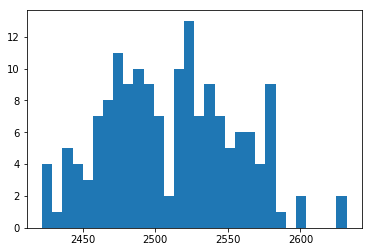

In [30]:
#medium_districts_ID1 = medium_districts_ID1[~(medium_districts_ID1['Mean Scale Score'] < 5000)]
_ = plt.hist(medium_districts_ID1['Mean Scale Score'], density=False, bins=30)

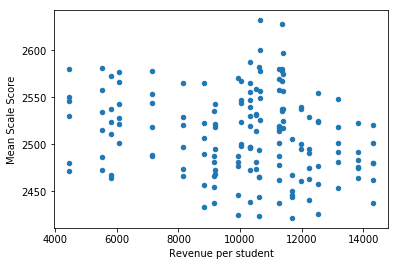

In [31]:
scatterplot1 = medium_districts_ID1[['Revenue per student', 'Mean Scale Score']]
scatterplot1
scatterplot1.plot.scatter(x='Revenue per student', y='Mean Scale Score')

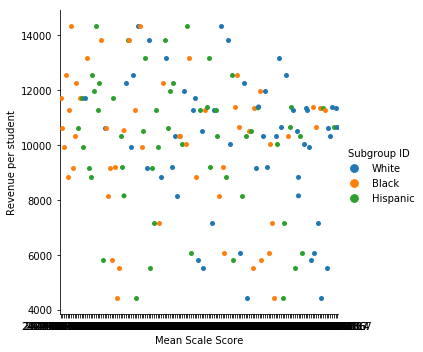

In [32]:
_ = sns.catplot(x='Mean Scale Score', y="Revenue per student", hue="Subgroup ID", kind="swarm", data=medium_districts_ID1)

## Small districts: between 10,000 and 30,000 total enrollment

In [33]:
small_districts_ID1 = test_ID1[(test_ID1['Total Enrollment'] < 30_000) & (test_ID1['Total Enrollment'] >= 10_000)]
print(small_districts_ID1.shape)


small_districts_ID1.head(5)

(733, 15)


,Agency Name,Total Enrollment,Revenue per student,Subgroup ID,Count Enrollment per ethnicity,Mean Scale Score,CAASPP Reported Enrollment,Students Tested,Total Standard Exceeded,Total Standard Met,Total Standard Nearly Met,Total Standard Not Met,Disadvantaged,Pass,Fail
1608,ABC UNIFIED,20722.0,10918.4,Hispanic,9425.0,2501.100000,3805.0,3715.0,492.0,1105.0,1030.0,1087.0,Disadvantaged,1597.0,2117.0
3,ABC UNIFIED,20722.0,10918.4,Black,1791.0,2503.342857,543.0,527.0,76.0,169.0,124.0,157.0,Disadvantaged,245.0,281.0
4419,ABC UNIFIED,20722.0,10918.4,White,1302.0,2575.485714,463.0,447.0,175.0,166.0,66.0,40.0,Not Disadvantaged,341.0,106.0
4417,ABC UNIFIED,20722.0,10918.4,White,1302.0,2517.414286,226.0,215.0,43.0,65.0,58.0,49.0,Disadvantaged,108.0,107.0
1,ABC UNIFIED,20722.0,10918.4,Black,1791.0,2542.928571,405.0,394.0,102.0,143.0,93.0,56.0,Not Disadvantaged,245.0,149.0


In [34]:
# correlation between the variables
corr2 = small_districts_ID1.corr()
corr2.style.background_gradient(cmap='coolwarm')
# 'RdBu_r' & 'BrBG' are other good diverging colormaps

,Total Enrollment,Revenue per student,Count Enrollment per ethnicity,Mean Scale Score,CAASPP Reported Enrollment,Students Tested,Total Standard Exceeded,Total Standard Met,Total Standard Nearly Met,Total Standard Not Met,Pass,Fail
Total Enrollment,1,0.113892,0.329784,0.0425652,0.225657,0.225794,0.212511,0.256153,0.211553,0.163204,0.250699,0.184287
Revenue per student,0.113892,1,0.111817,-0.184966,0.097594,0.0996289,-0.0973659,0.0425401,0.132313,0.173911,-0.013772,0.159034
Count Enrollment per ethnicity,0.329784,0.111817,1,-0.0516888,0.716521,0.715959,0.508284,0.726211,0.704204,0.622201,0.671406,0.661545
Mean Scale Score,0.0425652,-0.184966,-0.0516888,1,-0.174839,-0.176598,0.249121,-0.0432407,-0.248883,-0.352447,0.0767115,-0.314573
CAASPP Reported Enrollment,0.225657,0.097594,0.716521,-0.174839,1,0.999885,0.66652,0.962711,0.980695,0.922803,0.887012,0.955599
Students Tested,0.225794,0.0996289,0.715959,-0.176598,0.999885,1,0.663243,0.962168,0.98172,0.92417,0.8853,0.956843
Total Standard Exceeded,0.212511,-0.0973659,0.508284,0.249121,0.66652,0.663243,1,0.806429,0.523444,0.347963,0.927492,0.421948
Total Standard Met,0.256153,0.0425401,0.726211,-0.0432407,0.962711,0.962168,0.806429,1,0.914975,0.788471,0.969021,0.847388
Total Standard Nearly Met,0.211553,0.132313,0.704204,-0.248883,0.980695,0.98172,0.523444,0.914975,1,0.9573,0.797076,0.984361
Total Standard Not Met,0.163204,0.173911,0.622201,-0.352447,0.922803,0.92417,0.347963,0.788471,0.9573,1,0.643807,0.993257


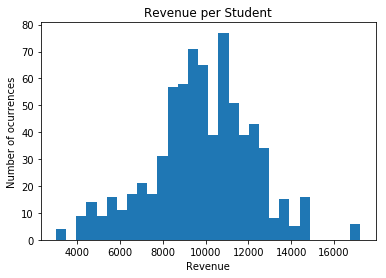

In [35]:
_ = plt.hist(small_districts_ID1['Revenue per student'], density=False, bins=30)
_ = plt.ylabel('Number of ocurrences')
_ = plt.xlabel('Revenue')
_ = plt.title("Revenue per Student")


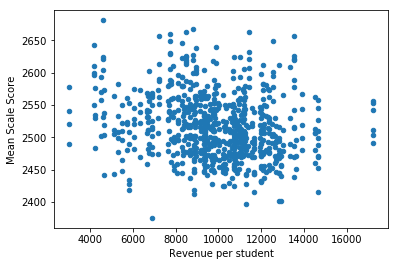

In [36]:
scatterplot = small_districts_ID1[['Revenue per student', 'Mean Scale Score']]
scatterplot
scatterplot.plot.scatter(x='Revenue per student', y='Mean Scale Score')

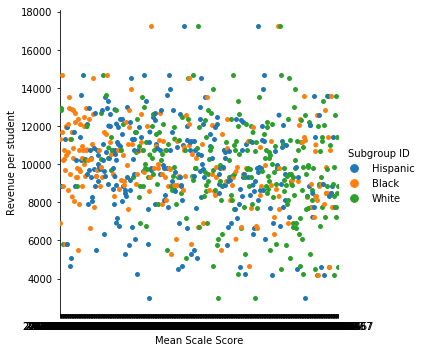

In [37]:
_ = sns.catplot(x='Mean Scale Score', y="Revenue per student", hue="Subgroup ID", kind="swarm", data=small_districts_ID1)

## Smaller districts: between 10,000 and 5,000 total enrollment

In [38]:
smaller_districts_ID1 = test_ID1[(test_ID1['Total Enrollment'] < 10_000) & (test_ID1['Total Enrollment'] >= 5_000)]
print(smaller_districts_ID1.shape)


smaller_districts_ID1.head(5)

(501, 15)


,Agency Name,Total Enrollment,Revenue per student,Subgroup ID,Count Enrollment per ethnicity,Mean Scale Score,CAASPP Reported Enrollment,Students Tested,Total Standard Exceeded,Total Standard Met,Total Standard Nearly Met,Total Standard Not Met,Disadvantaged,Pass,Fail
1612,ACALANES UNION HIGH,5502.0,6853.87,Hispanic,508.0,2536.9,20.0,18.0,2.0,3.0,9.0,4.0,Disadvantaged,5.0,13.0
4422,ACALANES UNION HIGH,5502.0,6853.87,White,3622.0,2618.3,32.0,28.0,7.0,8.0,11.0,2.0,Disadvantaged,15.0,13.0
1610,ACALANES UNION HIGH,5502.0,6853.87,Hispanic,508.0,2662.4,127.0,118.0,55.0,41.0,13.0,9.0,Not Disadvantaged,96.0,22.0
5,ACALANES UNION HIGH,5502.0,6853.87,Black,95.0,2568.6,19.0,18.0,4.0,5.0,3.0,6.0,Not Disadvantaged,9.0,9.0
4420,ACALANES UNION HIGH,5502.0,6853.87,White,3622.0,2677.4,880.0,831.0,453.0,253.0,82.0,43.0,Not Disadvantaged,706.0,125.0


In [39]:
# correlation between the variables
corr1 = smaller_districts_ID1.corr()
corr1.style.background_gradient(cmap='coolwarm')
# 'RdBu_r' & 'BrBG' are other good diverging colormaps

,Total Enrollment,Revenue per student,Count Enrollment per ethnicity,Mean Scale Score,CAASPP Reported Enrollment,Students Tested,Total Standard Exceeded,Total Standard Met,Total Standard Nearly Met,Total Standard Not Met,Pass,Fail
Total Enrollment,1,-0.00385528,0.212986,0.0180658,0.12119,0.120398,0.0836519,0.116679,0.113636,0.105601,0.108015,0.110219
Revenue per student,-0.00385528,1,0.105571,-0.187059,0.0888888,0.0899009,-0.117735,0.0380816,0.140481,0.174209,-0.0322964,0.162885
Count Enrollment per ethnicity,0.212986,0.105571,1,-0.0287213,0.664965,0.662668,0.409783,0.649592,0.657076,0.582771,0.575306,0.620337
Mean Scale Score,0.0180658,-0.187059,-0.0287213,1,-0.167499,-0.169334,0.271422,-0.0471727,-0.272343,-0.36695,0.0984948,-0.333597
CAASPP Reported Enrollment,0.12119,0.0888888,0.664965,-0.167499,1,0.999861,0.649328,0.957298,0.970629,0.892042,0.868984,0.935372
Students Tested,0.120398,0.0899009,0.662668,-0.169334,0.999861,1,0.648494,0.957826,0.971268,0.892067,0.868909,0.935645
Total Standard Exceeded,0.0836519,-0.117735,0.409783,0.271422,0.649328,0.648494,1,0.785091,0.462574,0.260128,0.93039,0.345145
Total Standard Met,0.116679,0.0380816,0.649592,-0.0471727,0.957298,0.957826,0.785091,1,0.892052,0.733312,0.957488,0.806885
Total Standard Nearly Met,0.113636,0.140481,0.657076,-0.272343,0.970629,0.971268,0.462574,0.892052,1,0.946561,0.743389,0.980463
Total Standard Not Met,0.105601,0.174209,0.582771,-0.36695,0.892042,0.892067,0.260128,0.733312,0.946561,1,0.555153,0.99151


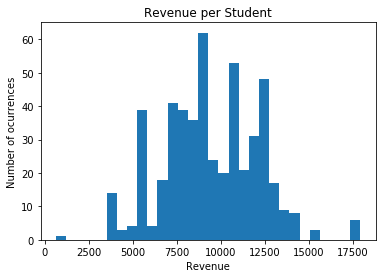

In [40]:
_ = plt.hist(smaller_districts_ID1['Revenue per student'], density=False, bins=30)
_ = plt.ylabel('Number of ocurrences')
_ = plt.xlabel('Revenue')
_ = plt.title("Revenue per Student")

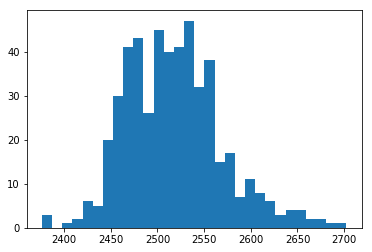

In [41]:
_ = plt.hist(smaller_districts_ID1['Mean Scale Score'], density=False, bins=30)

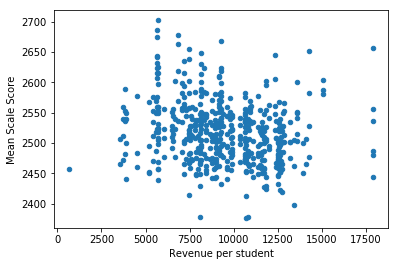

In [42]:
scatterplot = smaller_districts_ID1[['Revenue per student', 'Mean Scale Score']]
scatterplot
scatterplot.plot.scatter(x='Revenue per student', y='Mean Scale Score')

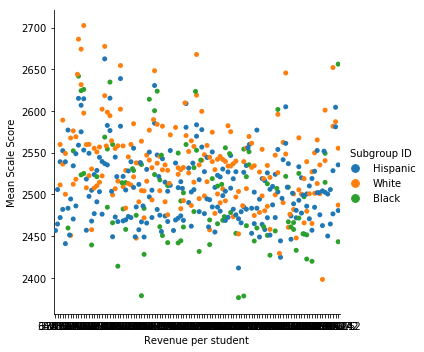

In [43]:
_ = sns.catplot(x="Revenue per student", y='Mean Scale Score', hue="Subgroup ID", kind="swarm", data=smaller_districts_ID1)

## Tiny districts: between 5,000 and 1,000 total enrollment

In [44]:
tiny_districts_ID1 = test_ID1[(test_ID1['Total Enrollment'] < 5_000) & (test_ID1['Total Enrollment'] >= 1000)]
print(tiny_districts_ID1.shape)


tiny_districts_ID1.head(5)

(1014, 15)


,Agency Name,Total Enrollment,Revenue per student,Subgroup ID,Count Enrollment per ethnicity,Mean Scale Score,CAASPP Reported Enrollment,Students Tested,Total Standard Exceeded,Total Standard Met,Total Standard Nearly Met,Total Standard Not Met,Disadvantaged,Pass,Fail
1627,ALBANY CITY UNIFIED,3702.0,15724.20,Hispanic,603.0,2561.400000,209.0,200.0,64.0,76.0,37.0,23.0,Not Disadvantaged,140.0,60.0
4440,ALBANY CITY UNIFIED,3702.0,15724.20,White,1368.0,2601.885714,709.0,687.0,372.0,214.0,69.0,32.0,Not Disadvantaged,586.0,101.0
4443,ALBANY CITY UNIFIED,3702.0,15724.20,White,1368.0,2588.200000,14.0,13.0,1.0,8.0,2.0,2.0,Disadvantaged,9.0,4.0
1630,ALBANY CITY UNIFIED,3702.0,15724.20,Hispanic,603.0,2528.000000,122.0,111.0,18.0,48.0,24.0,21.0,Disadvantaged,66.0,45.0
1645,ALPINE UNION ELEMENTARY,1745.0,7697.99,Hispanic,400.0,2522.733333,139.0,128.0,20.0,59.0,33.0,16.0,Not Disadvantaged,79.0,49.0


In [45]:
# correlation between the variables
corr1 = tiny_districts_ID1.corr()
corr1.style.background_gradient(cmap='coolwarm')
# 'RdBu_r' & 'BrBG' are other good diverging colormaps

,Total Enrollment,Revenue per student,Count Enrollment per ethnicity,Mean Scale Score,CAASPP Reported Enrollment,Students Tested,Total Standard Exceeded,Total Standard Met,Total Standard Nearly Met,Total Standard Not Met,Pass,Fail
Total Enrollment,1,0.0209479,0.431689,0.00731863,0.239809,0.23844,0.189442,0.245339,0.215574,0.171022,0.230748,0.191285
Revenue per student,0.0209479,1,0.123036,-0.145595,0.0873125,0.0903164,-0.139784,0.0199308,0.150106,0.208944,-0.0605144,0.189115
Count Enrollment per ethnicity,0.431689,0.123036,1,-0.0293409,0.602495,0.601326,0.339987,0.575911,0.596696,0.516421,0.488175,0.556252
Mean Scale Score,0.00731863,-0.145595,-0.0293409,1,-0.115527,-0.117581,0.31167,0.0404078,-0.249627,-0.367475,0.181262,-0.326946
CAASPP Reported Enrollment,0.239809,0.0873125,0.602495,-0.115527,1,0.999822,0.636729,0.943588,0.949886,0.848812,0.840541,0.902129
Students Tested,0.23844,0.0903164,0.601326,-0.117581,0.999822,1,0.634465,0.943358,0.951153,0.850088,0.839258,0.903422
Total Standard Exceeded,0.189442,-0.139784,0.339987,0.31167,0.636729,0.634465,1,0.790215,0.38251,0.159822,0.942333,0.250024
Total Standard Met,0.245339,0.0199308,0.575911,0.0404078,0.943588,0.943358,0.790215,1,0.83495,0.641104,0.949746,0.727626
Total Standard Nearly Met,0.215574,0.150106,0.596696,-0.249627,0.949886,0.951153,0.38251,0.83495,1,0.934397,0.651361,0.975116
Total Standard Not Met,0.171022,0.208944,0.516421,-0.367475,0.848812,0.850088,0.159822,0.641104,0.934397,1,0.431753,0.99012


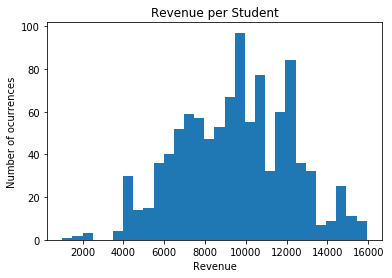

In [46]:
_ = plt.hist(tiny_districts_ID1['Revenue per student'], density=False, bins=30)
_ = plt.ylabel('Number of ocurrences')
_ = plt.xlabel('Revenue')
_ = plt.title("Revenue per Student")

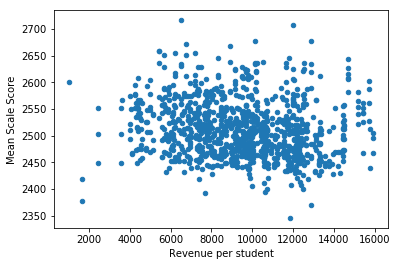

In [47]:
scatterplot1 = tiny_districts_ID1[['Revenue per student', 'Mean Scale Score']]
scatterplot1
scatterplot1.plot.scatter(x='Revenue per student', y='Mean Scale Score')

In [48]:
#_ = sns.catplot(x='Mean Scale Score', y="Revenue per student", hue="Subgroup ID", kind="swarm", data=tiny_districts_ID1)

## Mini districts: total enrollment less than 1,000

In [49]:
mini_districts_ID1 = test_ID1[(test_ID1['Total Enrollment'] < 1000)]
print(mini_districts_ID1.shape)

mini_districts_ID1.head(5)

(346, 15)


,Agency Name,Total Enrollment,Revenue per student,Subgroup ID,Count Enrollment per ethnicity,Mean Scale Score,CAASPP Reported Enrollment,Students Tested,Total Standard Exceeded,Total Standard Met,Total Standard Nearly Met,Total Standard Not Met,Disadvantaged,Pass,Fail
4425,ACKERMAN CHARTER,586.0,7525.60,White,460.0,2570.816667,233.0,229.0,98.0,91.0,29.0,11.0,Not Disadvantaged,189.0,40.0
4426,ACKERMAN CHARTER,586.0,7525.60,White,460.0,2469.800000,25.0,25.0,3.0,8.0,8.0,6.0,Disadvantaged,11.0,14.0
1641,ALPAUGH UNIFIED,793.0,6331.65,Hispanic,501.0,2430.600000,158.0,156.0,2.0,23.0,40.0,91.0,Disadvantaged,25.0,131.0
4463,ALTA VISTA ELEMENTARY,555.0,12798.20,White,76.0,2413.300000,24.0,23.0,0.0,2.0,6.0,15.0,Disadvantaged,2.0,21.0
1652,ALTA VISTA ELEMENTARY,555.0,12798.20,Hispanic,449.0,2421.283333,262.0,256.0,3.0,30.0,57.0,166.0,Disadvantaged,33.0,223.0


In [50]:
# correlation between the variables
corr1 = mini_districts_ID1.corr()
corr1.style.background_gradient(cmap='coolwarm')
# 'RdBu_r' & 'BrBG' are other good diverging colormaps

,Total Enrollment,Revenue per student,Count Enrollment per ethnicity,Mean Scale Score,CAASPP Reported Enrollment,Students Tested,Total Standard Exceeded,Total Standard Met,Total Standard Nearly Met,Total Standard Not Met,Pass,Fail
Total Enrollment,1,-0.119005,0.53268,0.105926,0.162776,0.160918,0.0754112,0.171211,0.156475,0.104972,0.129692,0.128385
Revenue per student,-0.119005,1,0.0238576,-0.281224,0.102291,0.106567,-0.211555,-0.106454,0.17834,0.351655,-0.171781,0.300226
Count Enrollment per ethnicity,0.53268,0.0238576,1,0.0319577,0.598234,0.593707,0.238651,0.528535,0.572856,0.484181,0.403603,0.536272
Mean Scale Score,0.105926,-0.281224,0.0319577,1,-0.100686,-0.103187,0.407138,0.17087,-0.273751,-0.467616,0.313127,-0.412972
CAASPP Reported Enrollment,0.162776,0.102291,0.598234,-0.100686,1,0.999576,0.56428,0.873149,0.903953,0.747526,0.760867,0.835279
Students Tested,0.160918,0.106567,0.593707,-0.103187,0.999576,1,0.560778,0.870586,0.905108,0.751935,0.757613,0.838638
Total Standard Exceeded,0.0754112,-0.211555,0.238651,0.407138,0.56428,0.560778,1,0.75571,0.219874,-0.0655978,0.941709,0.0390492
Total Standard Met,0.171211,-0.106454,0.528535,0.17087,0.873149,0.870586,0.75571,1,0.691082,0.366641,0.931988,0.502699
Total Standard Nearly Met,0.156475,0.17834,0.572856,-0.273751,0.903953,0.905108,0.219874,0.691082,1,0.841135,0.476711,0.933437
Total Standard Not Met,0.104972,0.351655,0.484181,-0.467616,0.747526,0.751935,-0.0655978,0.366641,0.841135,1,0.152036,0.979163


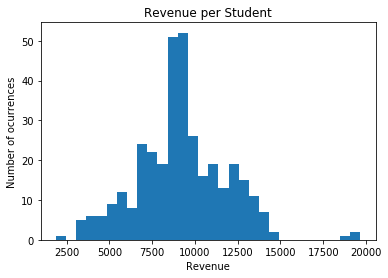

In [51]:
_ = plt.hist(mini_districts_ID1['Revenue per student'], density=False, bins=30)
_ = plt.ylabel('Number of ocurrences')
_ = plt.xlabel('Revenue')
_ = plt.title("Revenue per Student")

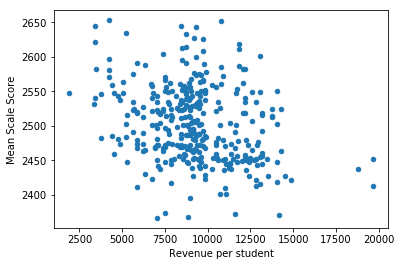

In [52]:
scatterplot1 = mini_districts_ID1[['Revenue per student', 'Mean Scale Score']]
scatterplot1
scatterplot1.plot.scatter(x='Revenue per student', y='Mean Scale Score')

---------------


# DATASET TEST ID 2

In [53]:
# Filter based on TEST ID2
list = ['2.0']
test_Id2 = df[df['Test Id'].isin(list)]
test_ID2 = test_Id1.drop(['Test Id', 'County Code', 'Total Tested At Entity Level', 
               'Total Standard Met and Above', 'Students Tested', 'Total Revenue',
              'Total Tested with Scores', 'Students with Scores', 'District Code'], axis=1)
test_ID2.head(5)


,Agency Name,Total Enrollment,Revenue per student,Subgroup ID,Count Enrollment per ethnicity,Mean Scale Score,CAASPP Reported Enrollment,Total Standard Exceeded,Total Standard Met,Total Standard Nearly Met,Total Standard Not Met,Disadvantaged
1608,ABC UNIFIED,20722.0,10918.4,Hispanic,9425.0,2501.100000,3805.0,492.0,1105.0,1030.0,1087.0,Disadvantaged
3,ABC UNIFIED,20722.0,10918.4,Black,1791.0,2503.342857,543.0,76.0,169.0,124.0,157.0,Disadvantaged
11099,ABC UNIFIED,20722.0,10918.4,Two or More Races,524.0,2495.650000,56.0,17.0,16.0,9.0,12.0,Disadvantaged
11101,ABC UNIFIED,20722.0,10918.4,Two or More Races,524.0,2597.571429,265.0,137.0,83.0,24.0,17.0,Not Disadvantaged
4419,ABC UNIFIED,20722.0,10918.4,White,1302.0,2575.485714,463.0,175.0,166.0,66.0,40.0,Not Disadvantaged


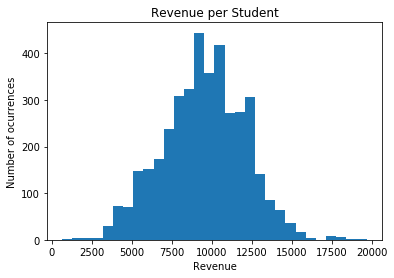

In [54]:
_ = plt.hist(test_ID2['Revenue per student'], density=False, bins=30)
_ = plt.ylabel('Number of ocurrences')
_ = plt.xlabel('Revenue')
_ = plt.title("Revenue per Student")



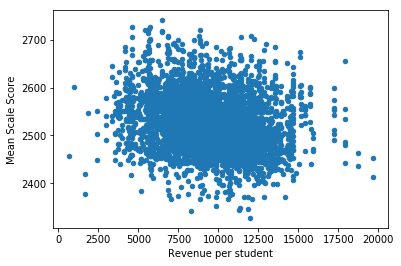

In [55]:
scatterplot1 = test_ID2[['Revenue per student', 'Mean Scale Score']]
scatterplot1
scatterplot1.plot.scatter(x='Revenue per student', y='Mean Scale Score')

In [56]:
corr = test_ID2.corr()
corr.style.background_gradient(cmap='coolwarm')
# 'RdBu_r' & 'BrBG' are other good diverging colormaps

,Total Enrollment,Revenue per student,Count Enrollment per ethnicity,Mean Scale Score,CAASPP Reported Enrollment,Total Standard Exceeded,Total Standard Met,Total Standard Nearly Met,Total Standard Not Met
Total Enrollment,1,0.11325,0.490357,0.0157829,0.372333,0.403793,0.384855,0.341382,0.324928
Revenue per student,0.11325,1,0.0683507,-0.206586,0.0593912,-0.0333191,0.0470057,0.0741086,0.0829793
Count Enrollment per ethnicity,0.490357,0.0683507,1,-0.0211636,0.781988,0.642413,0.788114,0.764418,0.738742
Mean Scale Score,0.0157829,-0.206586,-0.0211636,1,-0.0473065,0.14616,-0.0164864,-0.0808898,-0.105322
CAASPP Reported Enrollment,0.372333,0.0593912,0.781988,-0.0473065,1,0.773167,0.990889,0.992007,0.977342
Total Standard Exceeded,0.403793,-0.0333191,0.642413,0.14616,0.773167,1,0.825329,0.691254,0.629743
Total Standard Met,0.384855,0.0470057,0.788114,-0.0164864,0.990889,0.825329,1,0.973779,0.943177
Total Standard Nearly Met,0.341382,0.0741086,0.764418,-0.0808898,0.992007,0.691254,0.973779,1,0.991497
Total Standard Not Met,0.324928,0.0829793,0.738742,-0.105322,0.977342,0.629743,0.943177,0.991497,1


## Conclusions (as of now):
1. The correlation between revenue per student and students' outcome seem to vary significantly according to district size.

## Observations:
1. We don't have the data overtime. It'll be hard to come to a conclusion if revenue is affecting test scores if we don't know what the test scores and revenue have been in the past.
2. Our conclusions will be based on the year we have the data for.

## NEXT STEPS:
1. Run a best fit line for each ethinicity and outcome**. It will help to better understand the relationship between revenue and test score according to each racial group.
    a. Outcome (we have outcome in different forms): mean scale score, pass, fail, and the original system (exceeded, met, nearly met and didn't meet standards).
    b. Clean up this file. Keep what is relevant. Organize the kernels to have a better flow of information.
2. Merge poverty dataset from Census?
3. Come up with more questions to investigate?